In [1]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn import preprocessing

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

from sklearn.metrics import accuracy_score, confusion_matrix



In [9]:
props = pd.read_csv('../data/curated/places_property.csv')


In [10]:
props.columns

Index(['Address', 'Suburb', 'Prices', 'Type_Apartment', 'Type_House',
       'Type_Townhouse', 'Estimated resident population (no.)',
       'Population density (persons/km2)', 'Median age - persons (years)',
       'Working age population (aged 15-64 years) (no.)', 'Employed (no.)',
       'Unemployed (no.)', 'Renter (no.)',
       'Health care and social assistance (no.)',
       'Financial and insurance services (no.)',
       'Administrative and support services (no.)',
       'Education and training (no.)', 'Accommodation and food services (no.)',
       'Public administration and safety (no.)',
       'Value of residential building ($m)', 'Houses - total (no.)',
       'Townhouses - total (no.)', 'Apartments - total (no.)',
       'Median weekly household rental payment ($)', 'Rented (no.)',
       'Count of homeless persons (no.)',
       'Used at least one form of public transport (train, tram, bus, ferry) (no.)',
       'Extracted_Address', 'latitude', 'longitude', 'num_stops'

In [5]:
props= props.drop([2887])
props = props.reset_index(drop= True)

In [6]:
external = pd.read_csv('Property_external.csv')
med = external['Median equivalised total household income (weekly) ($)']
props['Median equivalised total household income (weekly) ($)'] = med

In [19]:
features = [
    'Type_Apartment', 'Type_House',
       'Type_Townhouse', 'Estimated resident population (no.)',
       'Population density (persons/km2)', 'Median age - persons (years)',
       'Working age population (aged 15-64 years) (no.)', 'Renter (no.)',
       'Health care and social assistance (no.)',
       'Financial and insurance services (no.)',
       'Administrative and support services (no.)',
       'Education and training (no.)', 'Accommodation and food services (no.)',
       'Public administration and safety (no.)',
       'Value of residential building ($m)', 'Houses - total (no.)',
       'Townhouses - total (no.)', 'Apartments - total (no.)',
       'Median weekly household rental payment ($)', 'Rented (no.)',
       'Count of homeless persons (no.)',
       'Used at least one form of public transport (train, tram, bus, ferry) (no.)', 'num_stops',
       'num_stations', 'num_schools', 'num_landmarks', 'distance to CBD',
       'total_transport'
       ]
X = props[features]
y= props['Prices']


In [20]:
X

,Type_Apartment,Type_House,Type_Townhouse,Estimated resident population (no.),Population density (persons/km2),Median age - persons (years),Working age population (aged 15-64 years) (no.),Renter (no.),Health care and social assistance (no.),Financial and insurance services (no.),...,Median weekly household rental payment ($),Rented (no.),Count of homeless persons (no.),"Used at least one form of public transport (train, tram, bus, ferry) (no.)",num_stops,num_stations,num_schools,num_landmarks,distance to CBD,total_transport
0,0,1,0,37666.0,4420.4,74.1,25272.0,193.0,157.0,63.0,...,681.0,3309.0,228.0,884.0,0.0,0.0,14.0,0.0,45.1,0.0
1,0,0,1,12561.0,2487.4,40.9,8357.0,27.0,190.0,68.0,...,440.0,1505.0,16.0,343.0,0.0,0.0,19.0,0.0,8.7,0.0
2,1,0,0,12561.0,2487.4,40.9,8357.0,27.0,190.0,68.0,...,440.0,1505.0,16.0,343.0,0.0,0.0,25.0,0.0,7.8,0.0
3,1,0,0,12561.0,2487.4,40.9,8357.0,27.0,190.0,68.0,...,440.0,1505.0,16.0,343.0,0.0,1.0,21.0,0.0,8.5,1.0
4,0,1,0,10564.0,1172.6,34.0,7808.0,53.0,69.0,21.0,...,369.0,1285.0,120.0,382.0,1.0,0.0,19.0,0.0,12.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,0,1,0,22858.0,2941.3,63.4,15428.0,244.0,50.0,8.0,...,686.0,2192.0,101.0,651.0,0.0,0.0,7.0,0.0,57.7,0.0
4198,1,0,0,28738.0,1704.2,78.8,18016.0,102.0,140.0,99.0,...,790.0,3440.0,108.0,600.0,0.0,1.0,5.0,0.0,22.5,1.0
4199,0,1,0,18665.0,1770.6,40.9,12311.0,67.0,45.0,33.0,...,341.0,1895.0,52.0,380.0,0.0,1.0,0.0,0.0,38.5,1.0
4200,0,1,0,23187.0,1174.1,43.3,14432.0,36.0,206.0,115.0,...,380.0,1533.0,140.0,241.0,0.0,0.0,0.0,0.0,56.5,0.0


<Axes: >

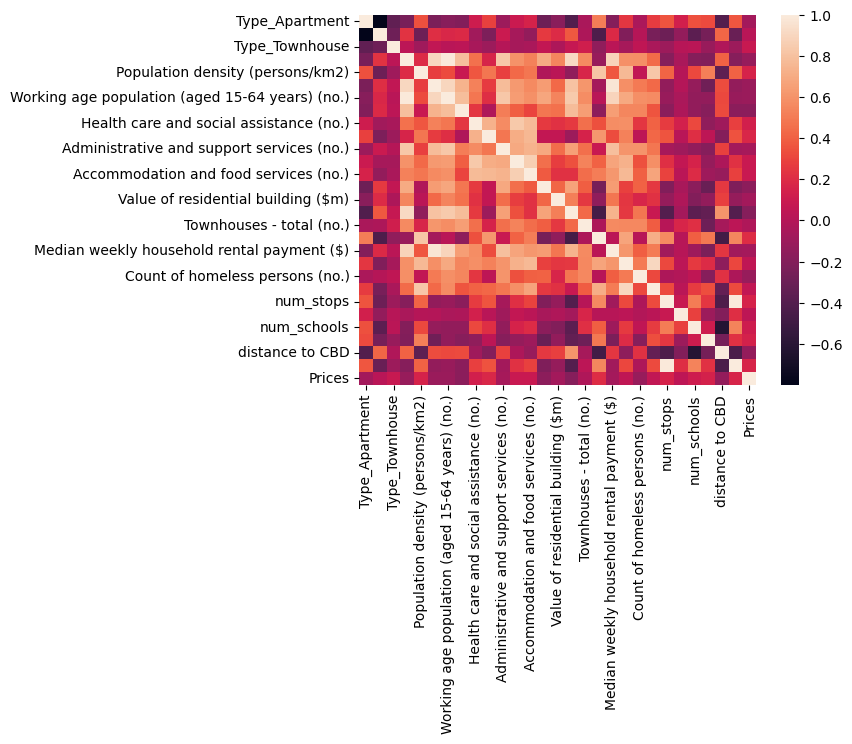

In [21]:
heatmap_features = features
heatmap_features.append('Prices')

heatmap_data = props[heatmap_features]
sns.heatmap(heatmap_data.corr())

In [22]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state=20037)





In [26]:
len(features)

29

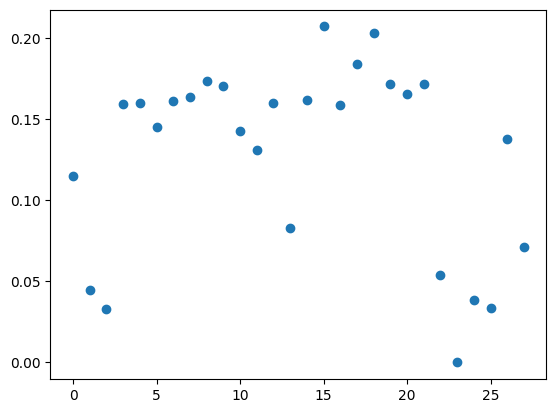

In [25]:
test = SelectKBest(score_func=mutual_info_classif, k=26)
fit = test.fit(X, y_encoded)

# Summarize scores
np.set_printoptions(precision=3)
i= range(len(features) -1)
plt.scatter(i, fit.scores_)



In [27]:
#SO take the best k = 20, since 6 clearly are not good
test = SelectKBest(score_func=mutual_info_classif, k=19)
fit = test.fit(X, y_encoded)



new_features = fit.transform(X)
    
new_features.shape


mask = fit.get_support() #list of booleans
best_features = [] # The list of your K best features

for bool_val, feature in zip(mask, features):
    if bool_val:
        best_features.append(feature)

best_features

['Type_Apartment',
 'Estimated resident population (no.)',
 'Population density (persons/km2)',
 'Median age - persons (years)',
 'Working age population (aged 15-64 years) (no.)',
 'Renter (no.)',
 'Health care and social assistance (no.)',
 'Financial and insurance services (no.)',
 'Administrative and support services (no.)',
 'Education and training (no.)',
 'Accommodation and food services (no.)',
 'Value of residential building ($m)',
 'Houses - total (no.)',
 'Townhouses - total (no.)',
 'Apartments - total (no.)',
 'Median weekly household rental payment ($)',
 'Rented (no.)',
 'Count of homeless persons (no.)',
 'Used at least one form of public transport (train, tram, bus, ferry) (no.)']

In [28]:

rfc  = RandomForestClassifier(max_depth= 6, max_features='sqrt', n_estimators=300, random_state=18).fit(X_train, y_train)


y_pred = rfc.predict(X_test)


print('Model accuracy score with 300 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 300 decision-trees : 0.0797


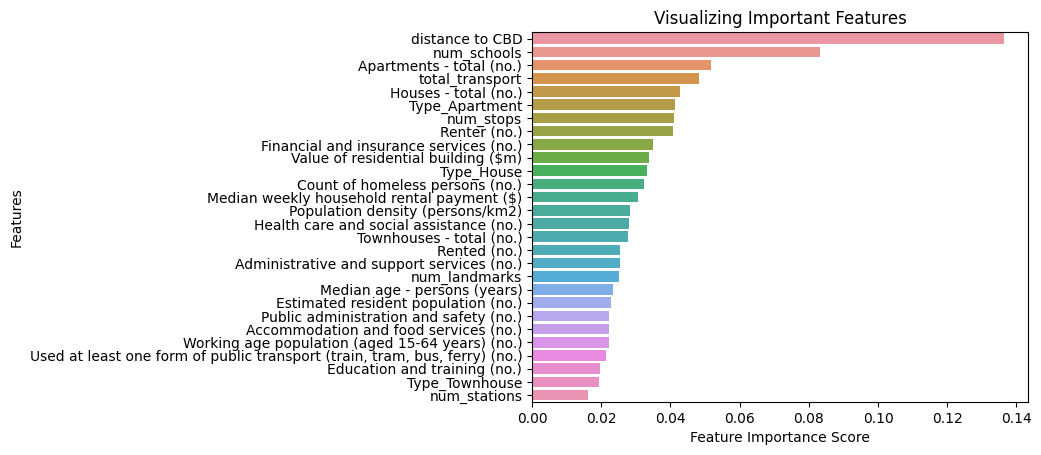

<Figure size 640x480 with 0 Axes>

In [29]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()
plt.savefig('visualising_important_features')

KMEANS

[0.6103646349315842, 0.5727240972727717, 0.5165553789366361, 0.500071896713162, 0.48807003564405255, 0.4443765983049546, 0.4333493835041533, 0.39110745259012547, 0.4096870514719965, 0.4345330211224841, 0.4327797190514531, 0.43572212935258575, 0.4461348771801169]


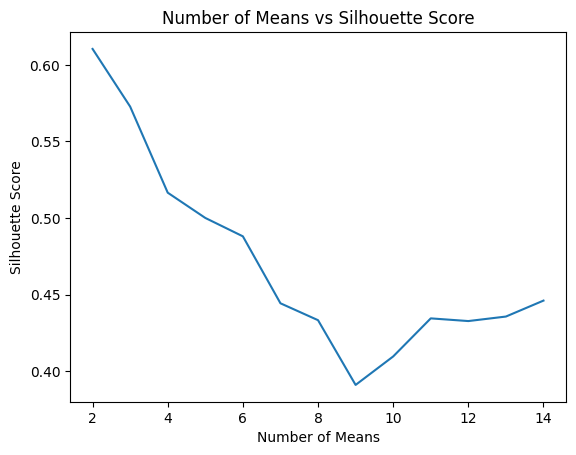

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20037)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

kmeans = KMeans(n_clusters=10, random_state=8, n_init='auto')
kmeans.fit(X_train_norm)

from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

K = range(2, 15)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

print(score)

sns.lineplot(x = K, y = score).set( title = 'Number of Means vs Silhouette Score', xlabel = 'Number of Means', ylabel  = 'Silhouette Score')
plt.savefig('Silhouette Score')
#Lower the better for the score

0.4333493835041533


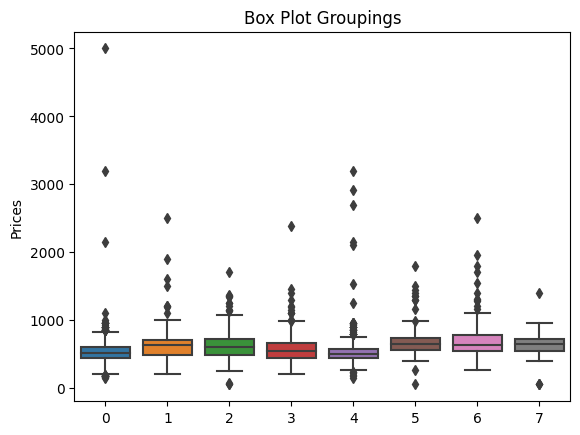

In [31]:
kmeans = KMeans(n_clusters=8, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

print(silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean'))


sns.boxplot(x = kmeans.labels_, y = y_train).set(title = 'Box Plot Groupings')
plt.savefig('Price Box Plots')